In [75]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from a_config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [76]:
target_user = input()

@innoutburger


In [77]:
counter = 1

# Variables for holding sentiments
sentiments = []

# Variable for max_id

oldest_tweet = None

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(50):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, max_id = oldest_tweet)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        # Get Tweet ID, subtract 1, and assign to oldest_tweet
        oldest_tweet = tweet['id'] - 1
        
        # Add sentiments for each tweet into a list
        sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        
        # Add to counter 
        counter += 1

In [78]:
public_tweets

[]

In [79]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,0.0,Mon Jun 13 20:41:34 +0000 2011,1.0,0.0,0.0,1
1,0.0,Sat Jun 11 03:06:36 +0000 2011,1.0,0.0,0.0,2
2,0.0,Sat Mar 05 03:30:02 +0000 2011,1.0,0.0,0.0,3


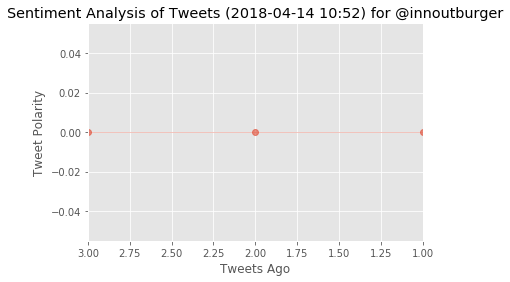

In [80]:
# Create plot
x_vals = sentiments_pd["Tweets Ago"]
y_vals = sentiments_pd["Compound"]
plt.plot(x_vals,
         y_vals, marker="o", linewidth=0.5,
         alpha=100)

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for {target_user}")
plt.xlim([x_vals.max(),x_vals.min()]) #Bonus
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

In [74]:
target_terms = ('@McDonalds', '@BurgerKing', '@CarlsJr','@innoutburger',)
# "Real Person" Filters
# min_tweets = 5
# max_tweets = 10000
# max_followers = 2500
# max_following = 2500
# lang = "en"

# List to hold results
results_list = []

# Loop through all target users
for target in target_terms:

    # Variable for holding the oldest tweet
    oldest_tweet = None

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    # Loop through 10 times
    for x in range(10):

        # Run search around each tweet
        public_tweets = api.search(
            target, count=100, result_type="recent", max_id=oldest_tweet)

        # Loop through all tweets
        for tweet in public_tweets["statuses"]:

            # Use filters to check if user meets conditions
            if (tweet["user"]["followers_count"] < max_followers
                and tweet["user"]["statuses_count"] > min_tweets
                and tweet["user"]["statuses_count"] < max_tweets
                and tweet["user"]["friends_count"] < max_following
                and tweet["user"]["lang"] == lang):

                # Run Vader Analysis on each tweet
                results = analyzer.polarity_scores(tweet["text"])
                compound = results["compound"]
                pos = results["pos"]
                neu = results["neu"]
                neg = results["neg"]

                # Add each value to the appropriate list
                compound_list.append(compound)
                positive_list.append(pos)
                negative_list.append(neg)
                neutral_list.append(neu)
                
            # Set the new oldest_tweet value
            oldest_tweet = tweet["id"] - 1

    # Store the Average Sentiments
    sentiment = {
        "User": target,
        "Compound": np.mean(compound_list),
        "Positive": np.mean(positive_list),
        "Neutral": np.mean(negative_list),
        "Negative": np.mean(neutral_list),
        "Tweet Count": len(compound_list)
    }

    # Print the Sentiments
    print(sentiment)
    print()
    
    # Append airline results to 'results_list'
    results_list.append(sentiment)

RateLimitError: [{'message': 'Rate limit exceeded', 'code': 88}]

In [72]:
all_restaurants_df = pd.DataFrame(results_list).set_index("User")*100
#all_restaurants_df = all_restaurants_df.sort_values(["Negative","Positive"], ascending=False)
all_restaurants_df

,Compound,Negative,Neutral,Positive,Tweet Count
User,,,,,
@McDonalds,1.342553,82.823877,7.744917,9.429314,42300
@BurgerKing,11.226570,83.084200,4.734719,12.181081,48100
@Wendys,13.250626,83.943094,4.786188,11.272007,54300
@ChickfilA,19.578863,81.982157,4.959412,13.051373,51000
@JackBox,5.476563,86.711667,5.830625,7.457708,48000
@sonicdrivein,11.365618,83.838240,5.358714,10.803384,59100
@DairyQueen,14.661713,85.381215,4.067956,10.550092,54300
@CarlsJr,-1.313434,86.282828,6.865253,6.843030,49500
@Hardees,10.101367,86.824217,4.481878,8.689621,60700


In [43]:
positive = all_restaurants_df(['Positive'], dtype='object')
positive

TypeError: 'DataFrame' object is not callable

In [28]:

# Chart our data, give it a title, and label the axes
positive_ = gender_trips.plot(kind="bar", title="Bike Trips by Gender")
gender_chart.set_xlabel("Gender")
gender_chart.set_ylabel("Number of Trips Taken")

plt.show()

NameError: name 'gender_trips' is not defined